In [1]:
####### Imports #######
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage.feature import hog

import os

import cv2
import time as t

from skimage.transform import resize

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import random as rd

In [2]:
class Dict(dict):
    """Container object exposing keys as attributes.
    Dict objects are sometimes used as an output for functions and methods.
    They extend dictionaries by enabling values to be accessed by key,
    `bunch["value_key"]`, or by an attribute, `bunch.value_key`.
    Examples
    --------
    >>> from sklearn.utils import Bunch
    >>> b = Dict(a=1, b=2)
    >>> b['b']
    2
    >>> b.b
    2
    >>> b.a = 3
    >>> b['a']
    3
    >>> b.c = 6
    >>> b['c']
    6
    """

    def __init__(self, **kwargs):
        super().__init__(kwargs)

    def __setattr__(self, key, value):
        self[key] = value

    def __dir__(self):
        return self.keys()

    def __getattr__(self, key):
        try:
            return self[key]
        except KeyError:
            raise AttributeError(key)

    def __setstate__(self, state):
        # Bunch pickles generated with scikit-learn 0.16.* have an non
        # empty __dict__. This causes a surprising behaviour when
        # loading these pickles scikit-learn 0.17: reading bunch.key
        # uses __dict__ but assigning to bunch.key use __setattr__ and
        # only changes bunch['key']. More details can be found at:
        # https://github.com/scikit-learn/scikit-learn/issues/6196.
        # Overriding __setstate__ to be a noop has the effect of
        # ignoring the pickled __dict__
        pass

In [17]:
####### Code #######

def createDict(folder_path,size):
    """Create a DataFrame from a folder containing images
    
    Args:
        fodler_path (str): The folder location of the dataset

    Returns:
        df (DataFrame): The dataset in a pandas DataFrame format
    """
    datas = []
    targets = []
    
    for i in os.listdir(folder_path):
        for j in os.listdir(folder_path + "/" + i):
            if len(np.array(Image.open(folder_path + "/" + i + "/" + j).resize((size[0],size[1]))).shape) == 3:
                #print(folder_path + "/" + i + "/" + j, np.array(Image.open(folder_path + "/" + i + "/" + j).resize((size[0],size[1]))).shape)
                datas.append(np.array(Image.open(folder_path + "/" + i + "/" + j).resize((size[0],size[1]))))
                targets.append(i)
    return Dict(data = datas, target = targets)

In [ ]:
dico = createDict("./Car-Cat",(32,32))

In [13]:
img = dico['data']
label = dico['target']

In [14]:
p = np.random.permutation(len(img))
img = np.array(img)[p]
unique_label = set(label)
labeltonum = dict([(list(unique_label)[i],i) for i in range(len(unique_label))])
label = np.array([[labeltonum[e]] for e in label])[p]

In [15]:
train_images, train_labels = img[0:int(len(img)*0.7)], label[0:int(len(img)*0.7)]
test_images, test_labels = img[int(len(img)*0.7):], label[int(len(img)*0.7):]

IndexError: index 0 is out of bounds for axis 0 with size 0

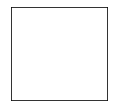

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(train_labels[i])
plt.show()

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))


Epoch 1/20


ValueError: in user code:

    /usr/local/insa/anaconda/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /usr/local/insa/anaconda/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/insa/anaconda/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/insa/anaconda/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/insa/anaconda/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /usr/local/insa/anaconda/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /usr/local/insa/anaconda/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /usr/local/insa/anaconda/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /usr/local/insa/anaconda/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:375 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    /usr/local/insa/anaconda/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:424 call
        return self._run_internal_graph(
    /usr/local/insa/anaconda/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:560 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /usr/local/insa/anaconda/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /usr/local/insa/anaconda/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense is incompatible with the layer: expected axis -1 of input shape to have value 1024 but received input with shape (None, 9216)


32/32 - 1s - loss: 0.3120 - accuracy: 0.9423
0.9423264861106873


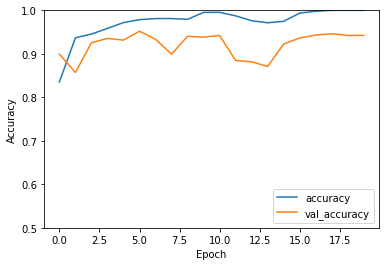

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

In [ ]:
img1 = np.array(Image.open("./car.jpeg").resize((32,32)))

In [ ]:
model.predict(np.array([img1]))

In [ ]:
classes = np.argmax(model.predict(np.array([img1])), axis = 1)

In [ ]:
classes